## Example for one value of $U$

In [1]:
from dmft2 import DMFT_lattice
precision = 0.001
U = 6.0
t = 1.0
mu = U/2
beta = 20
p1 = p2 = 10
n_site_bain = 2
N = 100
sig_imp, g_imp_nplus1, valeurs_prop, vecteurs_prop, data = DMFT_lattice(precision = precision,
                                                                U = U,t= t ,mu= mu,
                                                                beta= beta,p1=p1,p2=p2,
                                                                n_site_bain=n_site_bain,N=N)

=== DMFT loop 0 ===
occ =  (1.0000004507091715+0j)
 => diff: 0.8815316567593733
=== DMFT loop 1 ===
occ =  (1.0000026091147325+0j)
 => diff: 0.02576561539777043
=== DMFT loop 2 ===
occ =  (1.0000032679767927+0j)
 => diff: 0.008334571503469215
=== DMFT loop 3 ===
occ =  (1.0000028524523379+0j)
 => diff: 0.0028253860253853336
=== DMFT loop 4 ===
occ =  (1.0000025792811573+0j)
 => diff: 0.0009456460007485675


In [1]:
from dmft2 import DMFT_bethe
precision = 0.001
U = 6.0
t = 1.0
mu = U/2
beta = 20
p1 = p2 = 10
n_site_bain = 2
N = 100
sig_imp, g_imp_nplus1, valeurs_prop, vecteurs_prop, data = DMFT_bethe(precision = precision,
                                                                U = U,t= t ,mu= mu,
                                                                beta= beta,
                                                                n_site_bain=n_site_bain,N=N)


=== DMFT loop 0 ===
occ =  (0.9999999999592885+0j)
 => diff: 12.874709071612907
=== DMFT loop 1 ===
occ =  (0.999999999993305+0j)
 => diff: 0.043418980873321154
=== DMFT loop 2 ===
occ =  (0.9999999967762594+0j)
 => diff: 0.007243963813409179
=== DMFT loop 3 ===
occ =  (1.0000000016459114+0j)
 => diff: 0.0012027661303283146
=== DMFT loop 4 ===
occ =  (1.000000001046169+0j)
 => diff: 0.0001998276677386074


## Plots for one loop index

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(10, 10))
gs = GridSpec(3,3)
cols = ['b', 'or', 'g']
obs_list = [("g_loc",), ("delta", "delta_fit"), ("g_ronde", "g_ronde_fit", "g_imp_nplus1"), ("sig_imp",)]
for sub, obs_t in enumerate(obs_list):
    loop_ind = 3
    plt.subplot(gs[sub])
    for col, obs in enumerate(obs_t):
        if "sig" not in obs:
            plt.plot(data[f"{obs}_{loop_ind}"].real, "-"+cols[col], label=f"Re {obs}_{loop_ind}")
        plt.plot(data[f"{obs}_{loop_ind}"].imag, "--"+cols[col], label=f"Im {obs}_{loop_ind}")
    plt.xlabel(r"$\omega_n$")
    plt.legend()
    #plt.xlim(0,20)
    plt.grid()
plt.tight_layout()

## Plots for several loop indices

In [ ]:
plt.figure(figsize=(10, 10))
gs = GridSpec(3,3)
cols = ['b', 'r', 'g', 'c', 'm']
obs_list = ["g_loc", "delta","g_ronde", "g_imp_nplus1", "sig_imp"]
for sub, obs in enumerate(obs_list):
    plt.subplot(gs[sub])
    for col, loop_ind in enumerate(range(1,6)):
        try:
            if "sig" not in obs:
                plt.plot(data[f"{obs}_{loop_ind}"].real, "-"+cols[col], label=f"Re {obs}_{loop_ind}")
            plt.plot(data[f"{obs}_{loop_ind}"].imag, "--"+cols[col], label=f"Im {obs}_{loop_ind}")
        except:
            pass
    plt.xlabel(r"$\omega_n$")
    plt.legend()
    #plt.xlim(0,20)
    plt.grid()
plt.tight_layout()

## Locating the Mott transition

In [ ]:
U_list = np.linspace(0, 15, 10)

data = {}
for U in U_list:
    print(f"=== U = {U} ===")
    precision = 0.0001
    t = 1.0
    mu = U/2
    beta = 20
    p1 = p2 = p3 = 10
    n_site_bain = 2
    N = 100
    sig_imp, g_imp_nplus1, valeurs_prop, vecteurs_prop, data[U] = DMFT_lattice(precision = precision,
                                                                       U = U,t= t ,mu= mu,
                                                                       beta=beta,p1=p1,p2=p2,p3=p3,
                                                                       n_site_bain=n_site_bain,N=N)

In [ ]:
val_list = []
for U in U_list:
    #obs = "sig_imp"
    obs = "g_imp_nplus1"
    val = None
    for loop_ind in range(1, 10):
        try:
            val = data[U][f"{obs}_{loop_ind}"][0].imag
        except:
            pass
    val_list.append(val)
plt.plot(U_list, val_list, '-o')    
plt.grid()
if obs == "sig_imp":
    plt.ylabel(r"$\mathrm{Im}\Sigma_\mathrm{imp}(i\omega_0)$")
else:
    plt.ylabel(r"$\mathrm{Im} G_\mathrm{imp}(i\omega_0)$")
plt.xlabel(r"$U$");

## Locating the Mott transition (Bethe)

In [ ]:
import numpy as np
U_list = np.linspace(0, 6, 5)

data = {}
for U in U_list:
    print(f"=== U = {U} ===")
    precision = 0.0001
    t = 0.25
    mu = U/2
    beta = 20
    n_site_bain = 2
    N = 100
    sig_imp, g_imp_nplus1, valeurs_prop, vecteurs_prop, data[U] = DMFT_bethe(precision=precision,
                                                                             U=U, t=t, mu=mu,
                                                                             beta=beta, n_site_bain=n_site_bain, N=N)

=== U = 0.0 ===
=== DMFT loop 0 ===
occ =  (0.4921964629259744+0j)
 => diff: 13.9499742082673
=== DMFT loop 1 ===
occ =  (1.37305411941466+0j)
 => diff: 1.7601601672993454
=== DMFT loop 2 ===
occ =  (0.8542213630129193+0j)
 => diff: 0.5809087835603242
=== DMFT loop 3 ===
occ =  (1.068093401191664+0j)
 => diff: 0.17331693650562646
=== DMFT loop 4 ===
occ =  (0.9773062220933407+0j)
 => diff: 0.05334187251953553
=== DMFT loop 5 ===
occ =  (1.0069002268663907+0j)


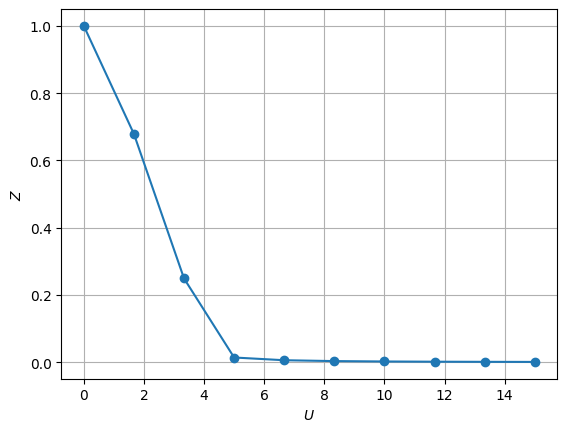

In [8]:
import matplotlib.pyplot as plt
val_list = []
for U in U_list:
    obs = "sig_imp"
    #obs = "g_imp_nplus1"
    val = None
    for loop_ind in range(1, 10):
        try:
            # Z = 1/(1 - Sig''(iomega_0)/omega_0)
            val = 1/(1-data[U][f"{obs}_{loop_ind}"][0].imag / (np.pi/beta))
        except:
            pass
    val_list.append(val)
plt.plot(U_list, val_list, '-o')    
plt.grid()
if obs == "sig_imp":
    #plt.ylabel(r"$\mathrm{Im}\Sigma_\mathrm{imp}(i\omega_0)$")
    plt.ylabel(r"$Z$")
else:
    plt.ylabel(r"$\mathrm{Im} G_\mathrm{imp}(i\omega_0)$")
plt.xlabel(r"$U$");

### Test fit_curve

In [ ]:

v = np.array([0.5, 0.25])
eps = np.array([1.14, 3.])
N =100
omegas = [(2 * n + 1) * 2 * np.pi / beta for n in range(N)]
delta = np.array([sum(v ** 2 / (1j*om - eps)) for om in omegas])
n = 1
x, pcov = fit_curve(delta, omegas, n)
delta_fit = delta_appro(omegas, *x)
print("x = ", x)
print("pcov =", pcov)
delta_fit = delta_fit[:len(delta_fit)//2] + 1j*delta_fit[len(delta_fit)//2:]

plt.plot(omegas, delta.imag, label = "original")
plt.plot(omegas, delta_fit.imag, label = "fit")
plt.legend()